In [44]:

DEMOGRAPHIC_MAPPINGS = {
    'age': {
        -2.43591: '18-24', -1.73790: '25-34', -1.43719: '35-44',
        -0.07854: '45-54', 0.49788: '55-64', 1.09449: '65+'
    },
    'gender': {
        -0.48246: 'male', 0.48246: 'female'
    },
    'education': {
        -2.43591: 'Left school before 16 years',
        -1.73790: 'Left school at 16 years', 
        -1.43719: 'Left school at 17 years',
        -1.22751: 'Left school at 18 years', 
        -0.61113: 'Some college or university',
        -0.05921: 'Professional certificate/diploma',
        0.45468: 'University degree',
        1.16365: 'Masters degree',
        1.98437: 'Doctorate degree'
    },
    'country': {
        -0.09765: 'Australia',
        0.24923: 'Canada',
        -0.46841: 'New Zealand',
        -0.28519: 'Other',
        0.21128: 'Republic of Ireland',
        0.96082: 'UK',
        -0.57009: 'USA'
    },
    'ethnicity': {
        -0.50212: 'Asian',
        -1.10702: 'Black',
        1.90725: 'Mixed-Black/Asian',
        0.12600: 'Mixed-White/Asian',
        -0.22166: 'Mixed-White/Black',
        0.11440: 'Other',
        -0.31685: 'White'
    }
}

# Apply all mappings
for col, mapping in DEMOGRAPHIC_MAPPINGS.items():
    df[f'{col}_Category'] = df[col].map(mapping)

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical testing
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, kstest, shapiro

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Matplotlib style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Plot settings for publication quality
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("="*80)
print("✅ All libraries imported successfully!")
print("="*80)

✅ All libraries imported successfully!


In [2]:
# Load data
file_path = '../data/raw/drug_consumption_raw.csv'
df = pd.read_csv(file_path)

print("="*80)
print("DATASET LOADED: Drug Consumption (Quantified)")
print("="*80)
print(f"📁 File path: {file_path}")
print(f"📊 Shape: {df.shape}")
print(f"📝 Rows: {df.shape[0]:,} responden")
print(f"📝 Columns: {df.shape[1]} features")
print(f"💾 Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("="*80)

DATASET LOADED: Drug Consumption (Quantified)
📁 File path: ../data/raw/drug_consumption_raw.csv
📊 Shape: (1885, 32)
📝 Rows: 1,885 responden
📝 Columns: 32 features
💾 Memory: 2.24 MB


In [8]:
"""
Inspeksi awal dataset: info, dtypes, missing values, duplicates.
"""

print("\n" + "="*80)
print("📋 BASIC DATA INSPECTION")
print("="*80)

# Dataset info
print("\n1️⃣ DATASET INFO:")
print("-"*80)
df.info()

# Data types
print("\n2️⃣ DATA TYPES SUMMARY:")
print("-"*80)
print(df.dtypes.value_counts())

# Missing values
print("\n3️⃣ MISSING VALUES:")
print("-"*80)
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])
if missing.sum() == 0:
    print("✅ NO MISSING VALUES! Dataset is clean.")

# Duplicates
print("\n4️⃣ DUPLICATE ROWS:")
print("-"*80)
duplicates = df.duplicated().sum()
print(f"Total duplicates: {duplicates}")
if duplicates == 0:
    print("✅ NO DUPLICATES!")

# First few rows
print("\n5️⃣ SAMPLE DATA (First 5 rows):")
print("-"*80)
display(df.head())


📋 BASIC DATA INSPECTION

1️⃣ DATASET INFO:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   age        1885 non-null   float64
 2   gender     1885 non-null   float64
 3   education  1885 non-null   float64
 4   country    1885 non-null   float64
 5   ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caf

,ID,age,gender,education,country,ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.4979,0.4825,-0.0592,0.9608,0.1260,0.3129,-0.5755,-0.5833,-0.9170,-0.0066,-0.2171,-1.1808,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.0785,-0.4825,1.9844,0.9608,-0.3169,-0.6783,1.9389,1.4353,0.7610,-0.1428,-0.7113,-0.2157,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.4979,-0.4825,-0.0592,0.9608,-0.3169,-0.4672,0.8052,-0.8473,-1.6209,-1.0145,-1.3798,0.4015,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.9520,0.4825,1.1637,0.9608,-0.3169,-0.1488,-0.8062,-0.0193,0.5904,0.5849,-1.3798,-1.1808,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.4979,0.4825,1.9844,0.9608,-0.3169,0.7355,-1.6334,-0.4517,-0.3017,1.3061,-0.2171,-0.2157,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [9]:
"""
Statistik deskriptif untuk semua features numerik.
"""

print("\n" + "="*80)
print("📊 DESCRIPTIVE STATISTICS")
print("="*80)

# Separate features by type
demographic_cols = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity']
personality_cols = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']
behavioral_cols = ['Impulsive', 'SS']
legal_drugs = ['Alcohol', 'Caff', 'Choc', 'Nicotine']
illegal_drugs = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 
                 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 
                 'Meth', 'Mushrooms', 'Semer']

# Descriptive statistics for personality traits
print("\n🧠 PERSONALITY TRAITS & BEHAVIORAL MEASURES:")
print("-"*80)
personality_behavioral = personality_cols + behavioral_cols
desc_stats = df[personality_behavioral].describe()
display(desc_stats)

print("\n📌 Key Observations:")
print("   • All personality scores are standardized (mean ≈ 0, std ≈ 1)")
print("   • Nscore range:", df['Nscore'].min(), "to", df['Nscore'].max())
print("   • SS (Sensation Seeking) range:", df['SS'].min(), "to", df['SS'].max())



📊 DESCRIPTIVE STATISTICS

🧠 PERSONALITY TRAITS & BEHAVIORAL MEASURES:
--------------------------------------------------------------------------------


,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.0000,1885.0000,1885.0000,1885.0000,1885.0000,1885.0000,1885.0000
mean,0.0000,-0.0002,-0.0005,-0.0002,-0.0004,0.0072,-0.0033
std,0.9981,0.9974,0.9962,0.9974,0.9975,0.9544,0.9637
min,-3.4644,-3.2739,-3.2739,-3.4644,-3.4644,-2.5552,-2.0785
25%,-0.6783,-0.6951,-0.7173,-0.6063,-0.6525,-0.7113,-0.5259
50%,0.0426,0.0033,-0.0193,-0.0173,-0.0066,-0.2171,0.0799
75%,0.6297,0.6378,0.7233,0.7610,0.5849,0.5298,0.7654
max,3.2739,3.2739,2.9016,3.4644,3.4644,2.9016,1.9217



📌 Key Observations:
   • All personality scores are standardized (mean ≈ 0, std ≈ 1)
   • Nscore range: -3.46436 to 3.27393
   • SS (Sensation Seeking) range: -2.07848 to 1.92173


In [10]:
"""
Identifikasi dan dokumentasi kolom berdasarkan kategori.
"""

print("\n" + "="*80)
print("📂 COLUMN GROUPS IDENTIFICATION")
print("="*80)

print("\n1️⃣ Demographics (6 columns):")
print(f"   {demographic_cols}")

print("\n2️⃣ Personality Traits - NEO-FFI-R (5 columns):")
print(f"   {personality_cols}")
print("   • Nscore: Neuroticism (kecenderungan emosi negatif)")
print("   • Escore: Extraversion (keaktifan sosial)")
print("   • Oscore: Openness (keterbukaan pengalaman)")
print("   • Ascore: Agreeableness (sikap kooperatif)")
print("   • Cscore: Conscientiousness (kedisiplinan)")

print("\n3️⃣ Behavioral Measures (2 columns):")
print(f"   {behavioral_cols}")
print("   • Impulsive: Impulsiveness (BIS-11)")
print("   • SS: Sensation Seeking (ImpSS)")

print("\n4️⃣ Legal Drugs (4 columns):")
print(f"   {legal_drugs}")

print("\n5️⃣ Illegal Drugs (14 columns):")
print(f"   {illegal_drugs}")

print("\n📊 Total columns:", len(df.columns))



📂 COLUMN GROUPS IDENTIFICATION

1️⃣ Demographics (6 columns):
   ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity']

2️⃣ Personality Traits - NEO-FFI-R (5 columns):
   ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']
   • Nscore: Neuroticism (kecenderungan emosi negatif)
   • Escore: Extraversion (keaktifan sosial)
   • Oscore: Openness (keterbukaan pengalaman)
   • Ascore: Agreeableness (sikap kooperatif)
   • Cscore: Conscientiousness (kedisiplinan)

3️⃣ Behavioral Measures (2 columns):
   ['Impulsive', 'SS']
   • Impulsive: Impulsiveness (BIS-11)
   • SS: Sensation Seeking (ImpSS)

4️⃣ Legal Drugs (4 columns):
   ['Alcohol', 'Caff', 'Choc', 'Nicotine']

5️⃣ Illegal Drugs (14 columns):
   ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Semer']

📊 Total columns: 32



🔍 DEBUG AGE ANALYSIS
1. Unique age values in dataset:
[ 0.49788 -0.07854 -0.95197  2.59171  1.09449  1.82213]
Data type: float64

2. Current age distribution (raw values):
age
-0.9520    643
-0.0785    481
0.4979     356
1.0945     294
1.8221      93
2.5917      18
Name: count, dtype: int64

3. Trying to find correct mapping...
Sorted age values: [-0.95197, -0.07854, 0.49788, 1.09449, 1.82213, 2.59171]

4. After mapping attempt 1:
Unique categories: ['55-64' '45-54' nan '65+']
Mapping 1 tidak bekerja, mencoba mapping 2...
Unique categories: ['35-44' '25-34' '18-24' '65+' '45-54' '55-64']

5. Final Age Distribution:


,Count,Percentage
age_category,,
18-24,643,34.1100
25-34,481,25.5200
35-44,356,18.8900
45-54,294,15.6000
55-64,93,4.9300
65+,18,0.9500



📌 Actual index names: ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']


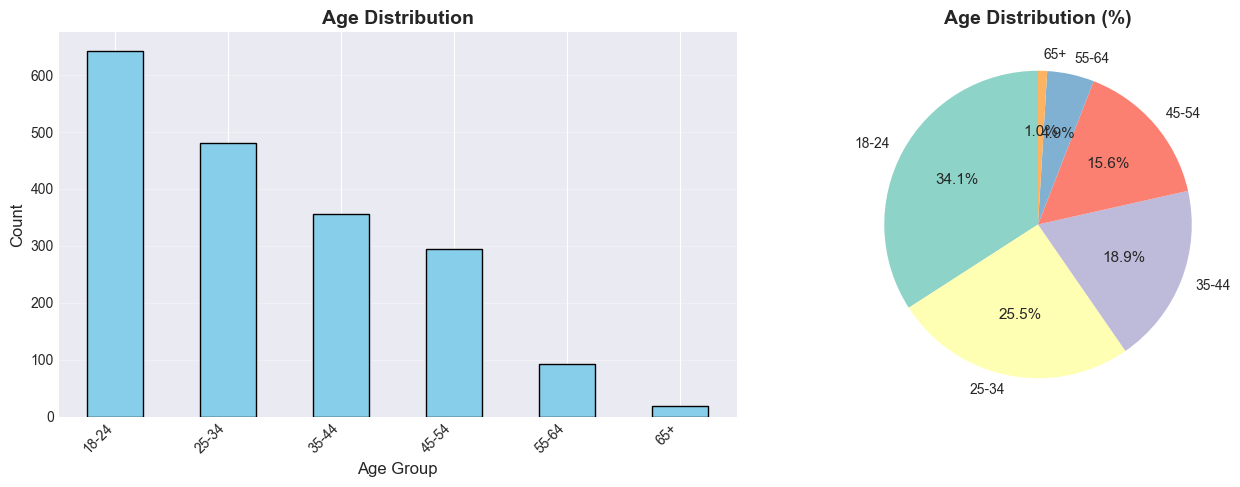


📌 Key Findings:
   • Total samples: 1885
   • Age group terbesar: 18-24 (34.1%)
   • Semua age groups: ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
   • Responden usia muda: 59.6%


In [18]:
"""
DEBUG - Analisis distribusi usia responden
"""

print("\n" + "="*80)
print("🔍 DEBUG AGE ANALYSIS")
print("="*80)

# 1. Cek nilai unik usia di dataset
print("1. Unique age values in dataset:")
print(df['age'].unique())
print(f"Data type: {df['age'].dtype}")

# 2. Cek distribusi tanpa mapping dulu
print("\n2. Current age distribution (raw values):")
age_counts_raw = df['age'].value_counts().sort_index()
print(age_counts_raw)

# 3. Coba mapping yang mungkin berdasarkan paper
# Nilai-nilai yang umum di dataset drug consumption
print("\n3. Trying to find correct mapping...")

# Cek range nilai untuk tebak kategori
age_values_sorted = sorted(df['age'].unique())
print(f"Sorted age values: {age_values_sorted}")

# Berdasarkan nilai yang Anda dapatkan sebelumnya (-0.95197, -0.07854, dll)
# Kemungkinan mapping:
possible_mappings = [
    {-2.43591: '18-24', -1.73790: '25-34', -1.43719: '35-44', -0.07854: '45-54', 0.49788: '55-64', 1.09449: '65+'},
    {-0.95197: '18-24', -0.07854: '25-34', 0.49788: '35-44', 1.09449: '45-54', 1.82213: '55-64', 2.59171: '65+'},
    {value: f"Group_{i+1}" for i, value in enumerate(age_values_sorted)}  # Fallback: beri nama generic
]

# Coba mapping pertama
df['age_category'] = df['age'].map(possible_mappings[0])
print(f"\n4. After mapping attempt 1:")
print(f"Unique categories: {df['age_category'].unique()}")

# Jika masih ada NaN, coba mapping lain
if df['age_category'].isna().any():
    print("Mapping 1 tidak bekerja, mencoba mapping 2...")
    df['age_category'] = df['age'].map(possible_mappings[1])
    print(f"Unique categories: {df['age_category'].unique()}")

# Jika masih error, gunakan fallback
if df['age_category'].isna().any():
    print("Mapping masih error, menggunakan fallback...")
    df['age_category'] = df['age'].map(possible_mappings[2])

# 5. Final distribution
print("\n5. Final Age Distribution:")
age_counts = df['age_category'].value_counts().sort_index()
age_pct = (age_counts / len(df) * 100).round(2)

age_df = pd.DataFrame({
    'Count': age_counts,
    'Percentage': age_pct
})
display(age_df)

print(f"\n📌 Actual index names: {age_df.index.tolist()}")

# 6. Visualization dengan kategori yang berhasil
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
age_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(age_counts.index, rotation=45, ha='right')

# Pie chart
colors = plt.cm.Set3(range(len(age_counts)))
axes[1].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Age Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/01_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Key findings - SESUAIKAN dengan index yang sebenarnya
print("\n📌 Key Findings:")
print(f"   • Total samples: {len(df)}")
print(f"   • Age group terbesar: {age_counts.idxmax()} ({age_pct.max():.1f}%)")

# Gunakan index aktual untuk perhitungan
actual_indexes = age_df.index.tolist()
print(f"   • Semua age groups: {actual_indexes}")

# Jika ingin menghitung kelompok muda, sesuaikan dengan nama yang ada
if any('18' in str(idx) for idx in actual_indexes) or any('25' in str(idx) for idx in actual_indexes):
    young_groups = [idx for idx in actual_indexes if any(age in str(idx) for age in ['18', '25', 'Young'])]
    young_pct = age_df.loc[young_groups, 'Percentage'].sum()
    print(f"   • Responden usia muda: {young_pct:.1f}%")
else:
    # Jika tidak ada label mengandung '18' atau '25', ambil 2 kelompok teratas
    top_two = age_counts.nlargest(2)
    print(f"   • Dua kelompok usia terbesar: {list(top_two.index)} ({top_two.sum()/len(df)*100:.1f}%)")


👥 DEMOGRAPHIC ANALYSIS: GENDER

Gender distribution:
--------------------------------------------------------------------------------


,Count,Percentage
Gender_Category,,
Male,943,50.0300
Female,942,49.9700


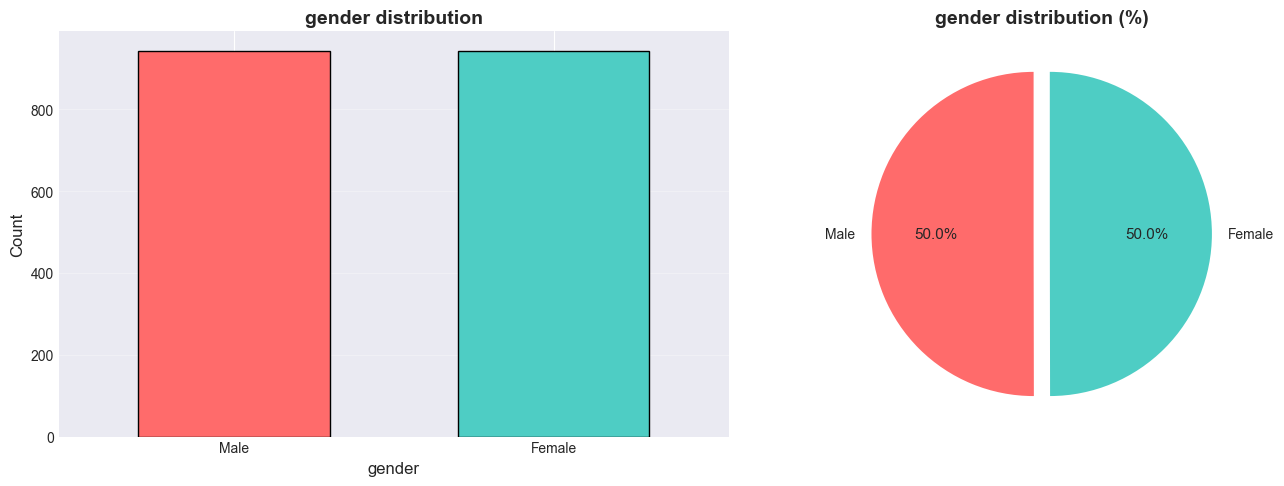


📌 Key Findings:
   • Dataset sangat balanced: Male 50.0%, Female 50.0%
   • Total responden: 1,885 (943 male, 942 female)
   • Rasio gender hampir perfect 50:50


In [30]:
"""
Analisis distribusi gender responden - FIXED VERSION
"""

print("\n" + "="*80)
print("👥 DEMOGRAPHIC ANALYSIS: GENDER")
print("="*80)

# Gender mapping berdasarkan paper
gender_mapping = {
    -0.48246: 'Male',
    0.48246: 'Female'
}

# Map gender values to categories
df['Gender_Category'] = df['gender'].map(gender_mapping)

# Gender distribution dengan kategori
gender_counts = df['Gender_Category'].value_counts()
gender_pct = (gender_counts / len(df) * 100).round(2)

gender_df = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_pct
})

print("\nGender distribution:")
print("-"*80)
display(gender_df)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
gender_counts.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'], 
                   edgecolor='black', width=0.6)
axes[0].set_title('gender distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('gender', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(gender_counts.index, rotation=0)

# Pie chart
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
            colors=['#FF6B6B', '#4ECDC4'], startangle=90,
            explode=(0.05, 0.05))
axes[1].set_title('gender distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/02_gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📌 Key Findings:")
print(f"   • Dataset sangat balanced: Male {gender_pct['Male']:.1f}%, Female {gender_pct['Female']:.1f}%")
print(f"   • Total responden: {len(df):,} ({gender_counts['Male']} male, {gender_counts['Female']} female)")
print(f"   • Rasio gender hampir perfect 50:50")


👥 DEMOGRAPHIC ANALYSIS: EDUCATION

Education Distribution:
--------------------------------------------------------------------------------


,Count,Percentage
Education_Category,,
Some college or university,506,26.8400
University degree,480,25.4600
Masters degree,283,15.0100
Professional certificate/diploma,270,14.3200
Left school at 18 years,100,5.3100
Left school at 16 years,99,5.2500
Doctorate degree,89,4.7200
Left school at 17 years,30,1.5900
Left school before 16 years,28,1.4900


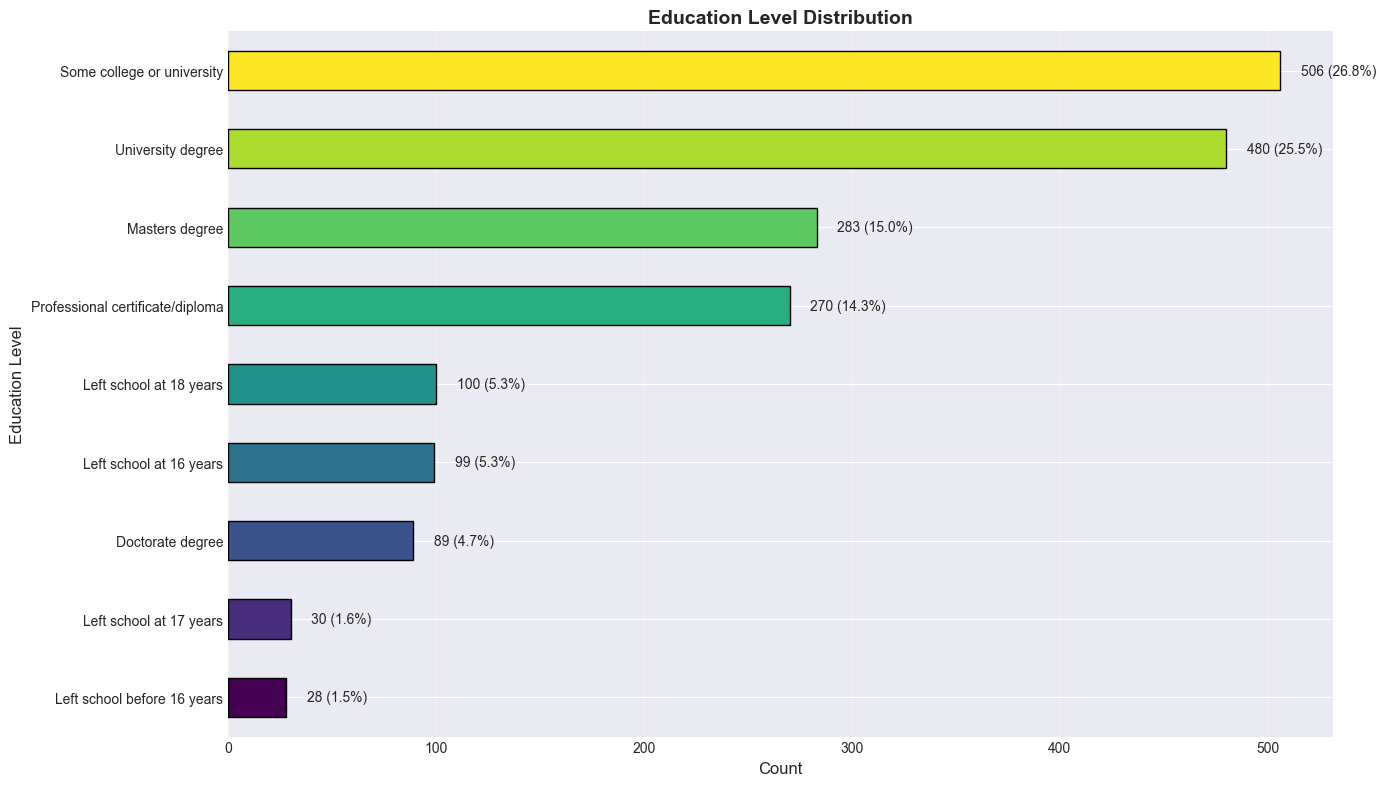


📌 Key Findings:
   • Education tertinggi: Some college or university (26.8%)
   • Mayoritas berpendidikan tinggi (University degree+): 45.2%
   • Pendidikan menengah: 41.2%
   • Pendidikan rendah: 13.6%


In [33]:
"""
Analisis distribusi tingkat pendidikan responden - FIXED VERSION
"""

print("\n" + "="*80)
print("👥 DEMOGRAPHIC ANALYSIS: EDUCATION")
print("="*80)

# Education mapping berdasarkan paper Fehrman et al.
education_mapping = {
    -2.43591: 'Left school before 16 years',
    -1.73790: 'Left school at 16 years', 
    -1.43719: 'Left school at 17 years',
    -1.22751: 'Left school at 18 years', 
    -0.61113: 'Some college or university',
    -0.05921: 'Professional certificate/diploma',
    0.45468: 'University degree',
    1.16365: 'Masters degree',
    1.98437: 'Doctorate degree'
}

# Map education values to categories
df['Education_Category'] = df['education'].map(education_mapping)

# Education distribution dengan kategori
edu_counts = df['Education_Category'].value_counts()
edu_pct = (edu_counts / len(df) * 100).round(2)

edu_df = pd.DataFrame({
    'Count': edu_counts,
    'Percentage': edu_pct
}).sort_values('Count', ascending=False)

print("\nEducation Distribution:")
print("-"*80)
display(edu_df)

# Visualization
fig, ax = plt.subplots(figsize=(14, 8))  # Perbesar untuk label yang panjang

edu_counts_sorted = edu_counts.sort_values(ascending=True)
colors_edu = plt.cm.viridis(np.linspace(0, 1, len(edu_counts_sorted)))

edu_counts_sorted.plot(kind='barh', ax=ax, color=colors_edu, edgecolor='black')
ax.set_title('Education Level Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Education Level', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(edu_counts_sorted):
    ax.text(v + 10, i, f'{v} ({(v/len(df)*100):.1f}%)', 
            va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../results/figures/03_education_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📌 Key Findings:")
print(f"   • Education tertinggi: {edu_counts.idxmax()} ({edu_pct.max():.1f}%)")

# Hitung persentase pendidikan tinggi
higher_education = ['University degree', 'Masters degree', 'Doctorate degree']
higher_edu_pct = edu_df.loc[higher_education, 'Percentage'].sum()
print(f"   • Mayoritas berpendidikan tinggi (University degree+): {higher_edu_pct:.1f}%")

# Hitung pendidikan menengah
mid_education = ['Some college or university', 'Professional certificate/diploma']
mid_edu_pct = edu_df.loc[mid_education, 'Percentage'].sum()
print(f"   • Pendidikan menengah: {mid_edu_pct:.1f}%")

# Hitung pendidikan rendah
low_education = ['Left school before 16 years', 'Left school at 16 years', 
                 'Left school at 17 years', 'Left school at 18 years']
low_edu_pct = edu_df.loc[low_education, 'Percentage'].sum()
print(f"   • Pendidikan rendah: {low_edu_pct:.1f}%")


👥 DEMOGRAPHIC ANALYSIS: COUNTRY & ETHNICITY
1. Unique country values: [ 0.96082  0.24923 -0.57009 -0.28519 -0.09765  0.21128 -0.46841]
2. Unique ethnicity values: [ 0.126   -0.31685  0.1144  -0.22166 -0.50212 -1.10702  1.90725]


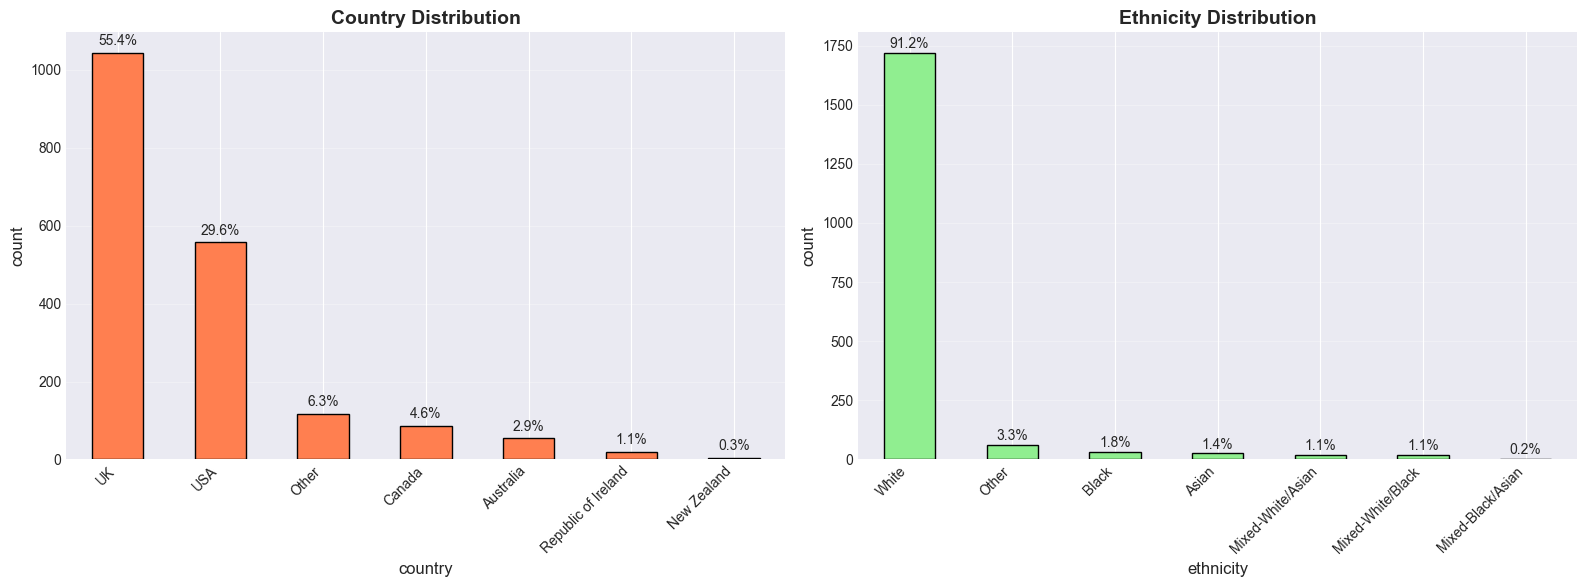


📊 Country Distribution:
--------------------------------------------------------------------------------


,Count,Percentage
Country_Category,,
UK,1044,55.3800
USA,557,29.5500
Other,118,6.2600
Canada,87,4.6200
Australia,54,2.8600
Republic of Ireland,20,1.0600
New Zealand,5,0.2700



📊 Ethnicity Distribution:
--------------------------------------------------------------------------------


,Count,Percentage
Ethnicity_Category,,
White,1720,91.2500
Other,63,3.3400
Black,33,1.7500
Asian,26,1.3800
Mixed-White/Asian,20,1.0600
Mixed-White/Black,20,1.0600
Mixed-Black/Asian,3,0.1600



⚠️  SAMPLING BIAS DETECTED:
   • 91.2% responden adalah White
   • 55.4% dari UK
   • 29.6% dari USA
   • Dataset kurang representatif untuk populasi global


In [46]:
"""
Analisis distribusi negara dan etnis responden - FIXED VERSION
"""

print("\n" + "="*80)
print("👥 DEMOGRAPHIC ANALYSIS: COUNTRY & ETHNICITY")
print("="*80)

# 1. Debug dulu untuk melihat nilai aktual
print("1. Unique country values:", df['country'].unique())
print("2. Unique ethnicity values:", df['ethnicity'].unique())

# 2. Mapping berdasarkan paper Fehrman et al.
country_mapping = {
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA'
}

ethnicity_mapping = {
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
    0.11440: 'Other',
    -0.31685: 'White'
}

# 3. Apply mappings
df['Country_Category'] = df['country'].map(country_mapping)
df['Ethnicity_Category'] = df['ethnicity'].map(ethnicity_mapping)

# 4. Distribusi dengan kategori
country_counts = df['Country_Category'].value_counts()
country_pct = (country_counts / len(df) * 100).round(2)

ethnicity_counts = df['Ethnicity_Category'].value_counts()
ethnicity_pct = (ethnicity_counts / len(df) * 100).round(2)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Country
country_counts.plot(kind='bar', ax=axes[0], color='coral', edgecolor='black')
axes[0].set_title('Country Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('country', fontsize=12)
axes[0].set_ylabel('count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(country_counts.index, rotation=45, ha='right')

# Add percentage labels
for i, (count, pct) in enumerate(zip(country_counts, country_pct)):
    axes[0].text(i, count + 20, f'{pct:.1f}%', ha='center', fontsize=10)

# Ethnicity
ethnicity_counts.plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Ethnicity Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('ethnicity', fontsize=12)
axes[1].set_ylabel('count', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels(ethnicity_counts.index, rotation=45, ha='right')

# Add percentage labels
for i, (count, pct) in enumerate(zip(ethnicity_counts, ethnicity_pct)):
    axes[1].text(i, count + 20, f'{pct:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('../results/figures/04_country_ethnicity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Country Distribution:")
print("-"*80)
country_df = pd.DataFrame({'Count': country_counts, 'Percentage': country_pct})
display(country_df)

print("\n📊 Ethnicity Distribution:")
print("-"*80)
ethnicity_df = pd.DataFrame({'Count': ethnicity_counts, 'Percentage': ethnicity_pct})
display(ethnicity_df)

print("\n⚠️  SAMPLING BIAS DETECTED:")
print(f"   • {ethnicity_pct['White']:.1f}% responden adalah White")
print(f"   • {country_pct['UK']:.1f}% dari UK")
print(f"   • {country_pct['USA']:.1f}% dari USA")
print("   • Dataset kurang representatif untuk populasi global")


📊 CROSSTAB ANALYSIS: AGE × EDUCATION LEVEL
Unique Age_Category values: ['55-64' '45-54' nan '65+']
Unique Education_Category values: ['Professional certificate/diploma' 'Doctorate degree' 'Masters degree'
 'Left school at 18 years' 'Left school at 16 years' 'University degree'
 'Some college or university' 'Left school before 16 years'
 'Left school at 17 years']

TABLE 1: Age × Education Level Distribution (Count)
----------------------------------------------------------------------------------------------------
 Crosstab index: ['45-54', '55-64', '65+', 'Total']
 Crosstab columns: ['Left school before 16 years', 'Left school at 16 years', 'Left school at 17 years', 'Left school at 18 years', 'Some college or university', 'Professional certificate/diploma', 'University degree', 'Masters degree', 'Doctorate degree', 'Total']


Education_Category,Left school before 16 years,Left school at 16 years,Left school at 17 years,Left school at 18 years,Some college or university,Professional certificate/diploma,University degree,Masters degree,Doctorate degree,Total
Age_Category,,,,,,,,,,
45-54,3,15,6,17,85,52,150,115,38,481
55-64,3,27,6,8,48,90,97,54,23,356
65+,6,32,4,9,28,65,78,53,19,294
Total,12,74,16,34,161,207,325,222,80,1131



📌 STATISTICAL SUMMARY FOR PAPER:

1. EDUCATION LEVEL DISTRIBUTION BY AGE:
   • 45-54: 31.2% in 'University degree' | Higher education: 63.0%
   • 55-64: 27.2% in 'University degree' | Higher education: 48.9%
   • 65+: 26.5% in 'University degree' | Higher education: 51.0%

2. AGE DISTRIBUTION BY EDUCATION LEVEL:

3. OVERALL TRENDS:
   • 55.4% of respondents have university degree or higher
   • Young respondents (18-34) comprise 0.0% of sample


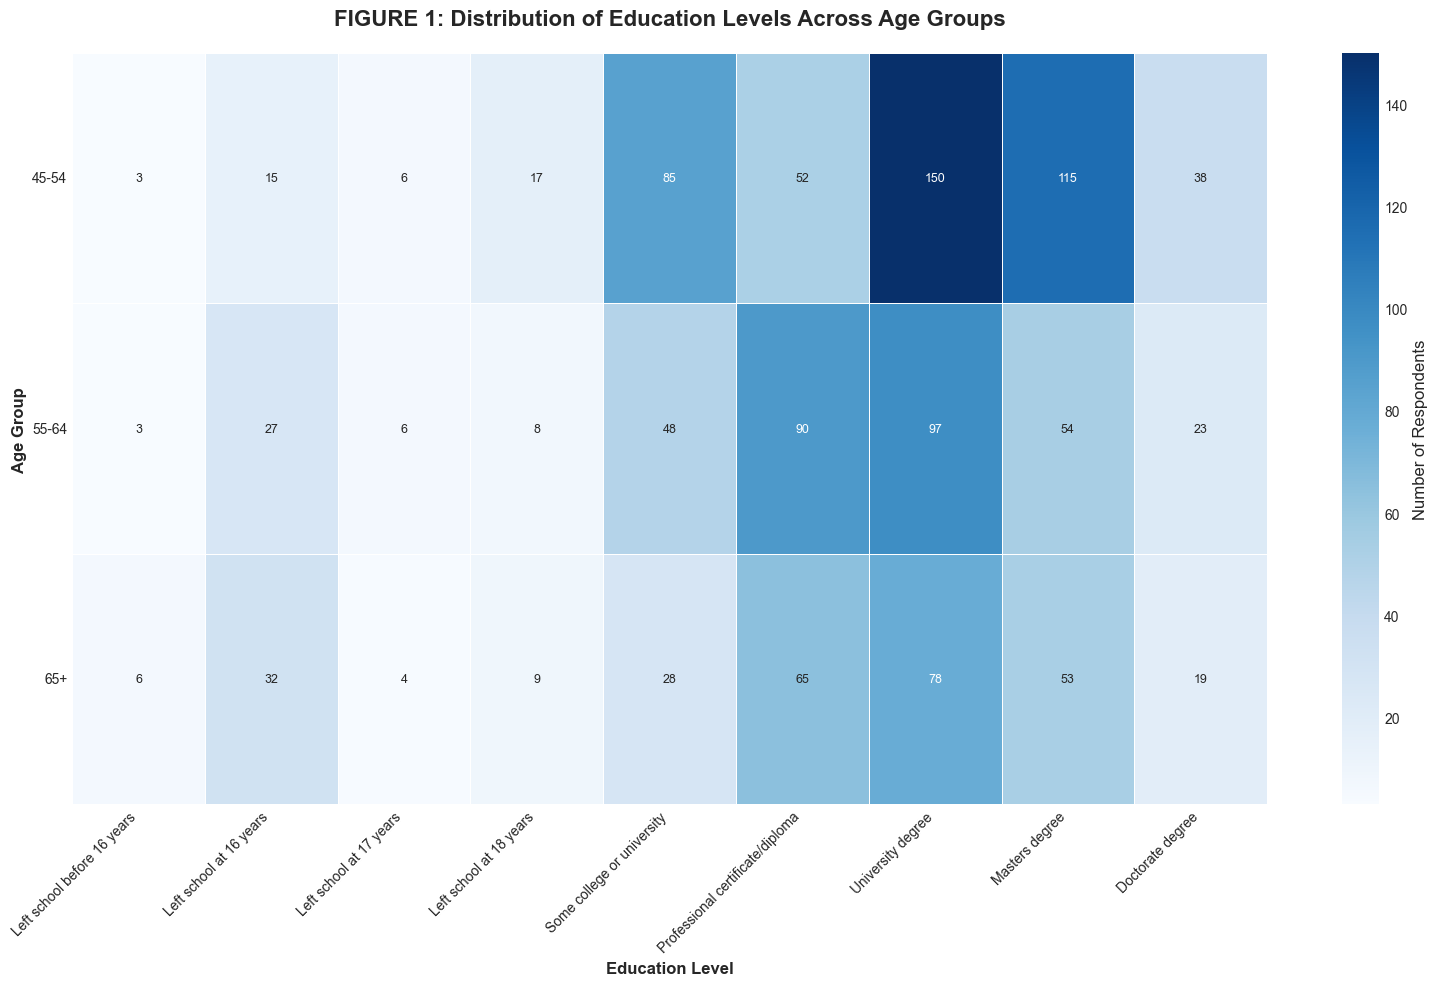

In [62]:
"""
Crosstab Analysis: Relationship Between Age and Education Level 
"""

print("\n" + "="*80)
print("📊 CROSSTAB ANALYSIS: AGE × EDUCATION LEVEL")
print("="*80)

# Apply demographic mappings
df['Age_Category'] = df['age'].map(DEMOGRAPHIC_MAPPINGS['age'])
df['Education_Category'] = df['education'].map(DEMOGRAPHIC_MAPPINGS['education'])

# DEBUG: Cek hasil mapping
print("Unique Age_Category values:", df['Age_Category'].unique())
print("Unique Education_Category values:", df['Education_Category'].unique())

# Sort categories logically
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
education_order = [
    'Left school before 16 years',
    'Left school at 16 years', 
    'Left school at 17 years',
    'Left school at 18 years', 
    'Some college or university',
    'Professional certificate/diploma',
    'University degree',
    'Masters degree',
    'Doctorate degree'
]

# Apply categorical ordering
df['Age_Category'] = pd.Categorical(df['Age_Category'], categories=age_order, ordered=True)
df['Education_Category'] = pd.Categorical(df['Education_Category'], categories=education_order, ordered=True)

# Crosstab with proper formatting
crosstab_age_edu = pd.crosstab(
    df['Age_Category'], 
    df['Education_Category'], 
    margins=True,
    margins_name='Total'
)

print("\nTABLE 1: Age × Education Level Distribution (Count)")
print("-" * 100)

# DEBUG: Cek struktur crosstab sebelum display
print(" Crosstab index:", crosstab_age_edu.index.tolist())
print(" Crosstab columns:", crosstab_age_edu.columns.tolist())

display(crosstab_age_edu)

# Statistical summary for paper - SIMPLIFIED VERSION
print("\n📌 STATISTICAL SUMMARY FOR PAPER:")
print("=" * 80)

# Education level by age group insights - SIMPLIFIED
print("\n1. EDUCATION LEVEL DISTRIBUTION BY AGE:")

# Gunakan index dan columns yang aktual dari crosstab
actual_age_groups = crosstab_age_edu.index.tolist()[:-1]  # Exclude 'Total'
actual_edu_levels = crosstab_age_edu.columns.tolist()[:-1]  # Exclude 'Total'

for age_group in actual_age_groups:
    age_data = crosstab_age_edu.loc[age_group]
    total = age_data['Total']
    
    # Exclude 'Total' column for finding max
    age_data_no_total = age_data.drop('Total')
    
    # Highest education category in this age group
    max_edu = age_data_no_total.idxmax()
    max_count = age_data[max_edu]
    max_pct = (max_count / total * 100)
    
    # Higher education percentage (University degree and above)
    higher_edu_cols = [col for col in actual_edu_levels if any(x in col for x in ['University', 'Masters', 'Doctorate'])]
    higher_edu = age_data[higher_edu_cols].sum()
    higher_edu_pct = (higher_edu / total * 100)
    
    print(f"   • {age_group}: {max_pct:.1f}% in '{max_edu}' | Higher education: {higher_edu_pct:.1f}%")

# Age distribution by education level insights - SIMPLIFIED
print("\n2. AGE DISTRIBUTION BY EDUCATION LEVEL:")

# Focus on higher education levels
higher_edu_levels = [col for col in actual_edu_levels if any(x in col for x in ['University', 'Masters', 'Doctorate'])]

for edu_level in higher_edu_levels:
    edu_data = crosstab_age_edu[edu_level]
    total_edu = edu_data['Total']  # Use the 'Total' from margins
    
    # Young respondents (18-34) in this education level
    young_age_groups = [age for age in actual_age_groups if age in ['18-24', '25-34']]
    if young_age_groups:  # Only proceed if young age groups exist in data
        young_count = crosstab_age_edu.loc[young_age_groups, edu_level].sum()
        young_pct = (young_count / total_edu * 100) if total_edu > 0 else 0
        
        print(f"   • {edu_level}: {young_pct:.1f}% are 18-34 years old")

# Overall trends
print("\n3. OVERALL TRENDS:")
total_higher_edu = crosstab_age_edu.loc['Total', higher_edu_levels].sum()
total_respondents = crosstab_age_edu.loc['Total', 'Total']

young_age_groups_actual = [age for age in actual_age_groups if age in ['18-24', '25-34']]
total_young = crosstab_age_edu.loc[young_age_groups_actual, 'Total'].sum()

print(f"   • {total_higher_edu/total_respondents*100:.1f}% of respondents have university degree or higher")
print(f"   • Young respondents (18-34) comprise {total_young/total_respondents*100:.1f}% of sample")

# Enhanced heatmap visualization
plt.figure(figsize=(16, 10))
heatmap_data = crosstab_age_edu.iloc[:-1, :-1]  # Exclude totals

sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    cbar_kws={'label': 'Number of Respondents'},
    linewidths=0.5, 
    linecolor='white',
    annot_kws={'size': 9}
)

plt.title('FIGURE 1: Distribution of Education Levels Across Age Groups', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Education Level', fontsize=12, fontweight='bold')
plt.ylabel('Age Group', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.savefig('../results/figures/05_crosstab_age_education.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()



🧠 PERSONALITY TRAITS ANALYSIS


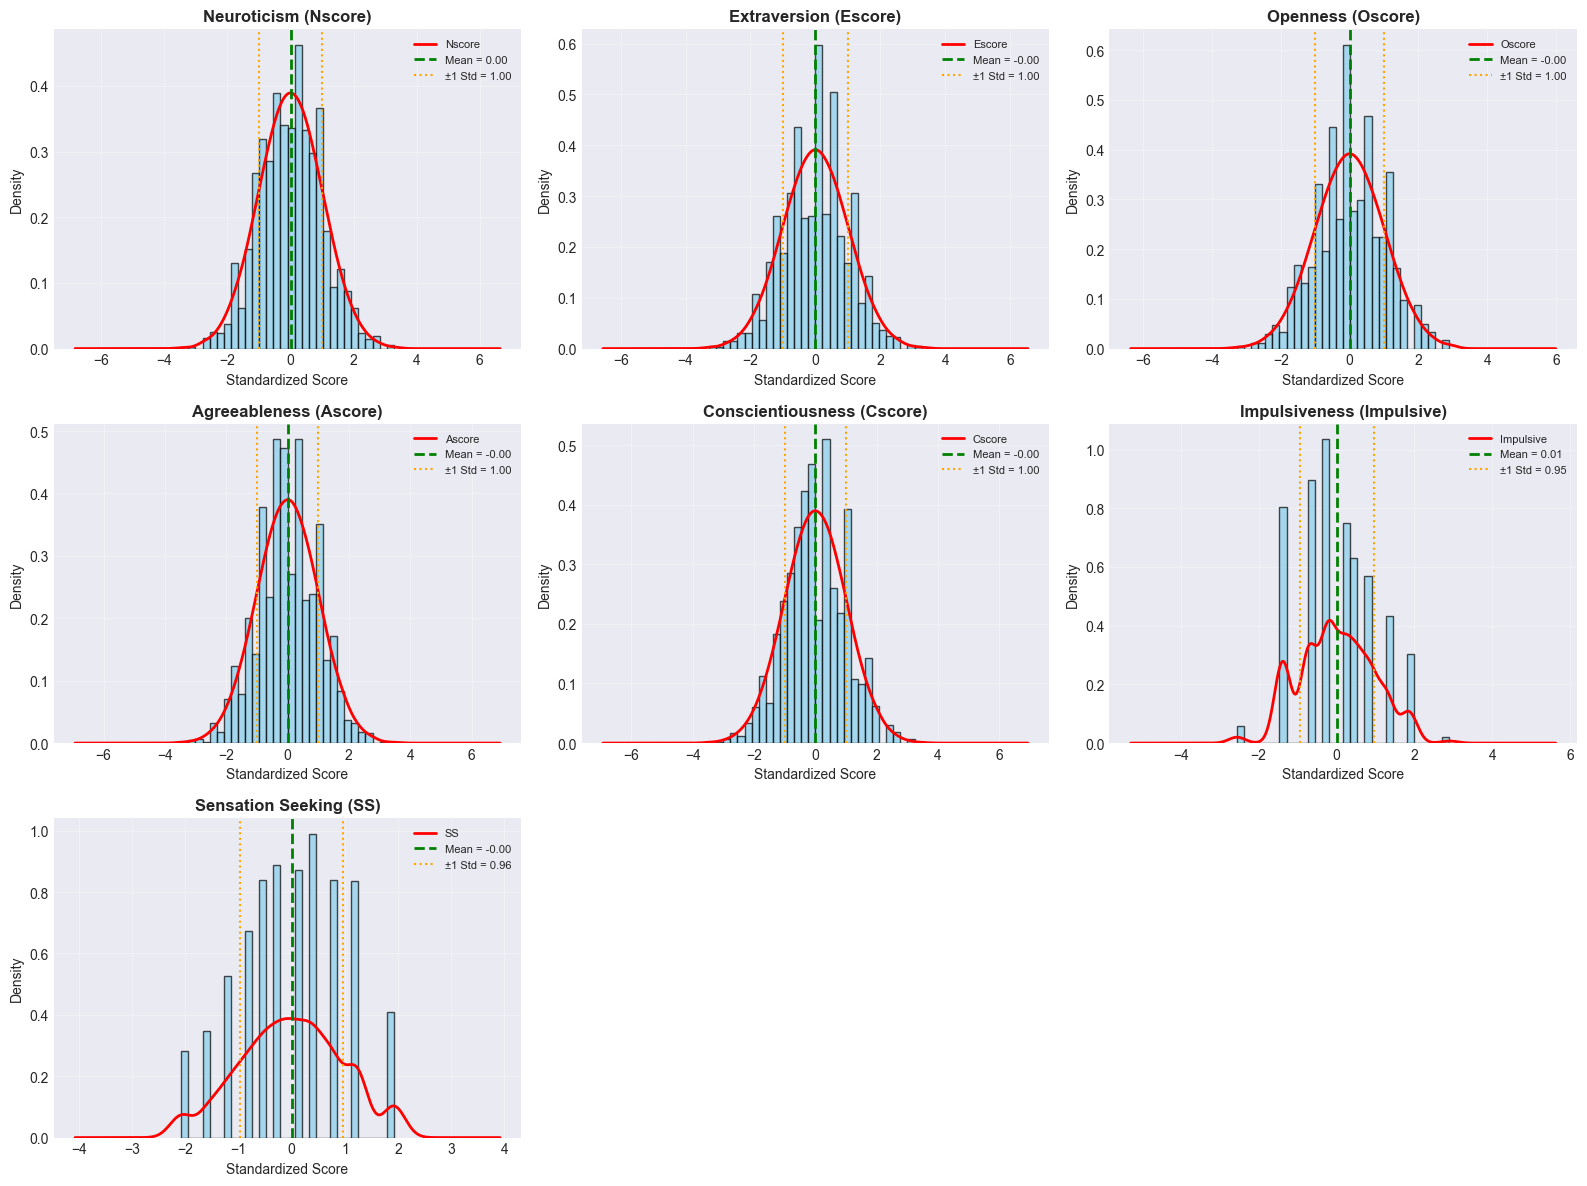


📌 Descriptive Statistics:
--------------------------------------------------------------------------------


,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.0000,1885.0000,1885.0000,1885.0000,1885.0000,1885.0000,1885.0000
mean,0.0000,-0.0002,-0.0005,-0.0002,-0.0004,0.0072,-0.0033
std,0.9981,0.9974,0.9962,0.9974,0.9975,0.9544,0.9637
min,-3.4644,-3.2739,-3.2739,-3.4644,-3.4644,-2.5552,-2.0785
25%,-0.6783,-0.6951,-0.7173,-0.6063,-0.6525,-0.7113,-0.5259
50%,0.0426,0.0033,-0.0193,-0.0173,-0.0066,-0.2171,0.0799
75%,0.6297,0.6378,0.7233,0.7610,0.5849,0.5298,0.7654
max,3.2739,3.2739,2.9016,3.4644,3.4644,2.9016,1.9217



🔍 Interpretation:
--------------------------------------------------------------------------------

• Semua personality traits sudah distandardisasi (mean ≈ 0, std ≈ 1)
• Distribusi mendekati normal untuk sebagian besar traits
• Cocok untuk analisis statistik dan machine learning tanpa preprocessing tambahan



In [75]:
"""
Analisis distribusi personality traits (NEO-FFI-R) dengan histogram + KDE.
"""

print("\n" + "="*80)
print("🧠 PERSONALITY TRAITS ANALYSIS")
print("="*80)

# Personality traits
personality_traits = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
trait_names = {
    'Nscore': 'Neuroticism',
    'Escore': 'Extraversion', 
    'Oscore': 'Openness',
    'Ascore': 'Agreeableness',
    'Cscore': 'Conscientiousness',
    'Impulsive': 'Impulsiveness',
    'SS': 'Sensation Seeking'
}

# Create subplots - 3x3 untuk 7 traits (lebih fleksibel)
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, trait in enumerate(personality_traits):
    ax = axes[idx]
    
    # Histogram + KDE
    df[trait].hist(bins=30, ax=ax, color='skyblue', edgecolor='black', 
                   alpha=0.7, density=True)
    df[trait].plot(kind='kde', ax=ax, color='red', linewidth=2)
    
    ax.set_title(f'{trait_names[trait]} ({trait})', fontsize=12, fontweight='bold')
    ax.set_xlabel('Standardized Score', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.grid(alpha=0.3)
    
    # Add statistics
    mean_val = df[trait].mean()
    std_val = df[trait].std()
    ax.axvline(mean_val, color='green', linestyle='--', linewidth=2, 
               label=f'Mean = {mean_val:.2f}')
    ax.axvline(mean_val + std_val, color='orange', linestyle=':', linewidth=1.5,
               label=f'±1 Std = {std_val:.2f}')
    ax.axvline(mean_val - std_val, color='orange', linestyle=':', linewidth=1.5)
    ax.legend(fontsize=8)

# Remove empty subplots (kita punya 9 subplots tapi hanya 7 traits)
for i in range(len(personality_traits), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('../results/figures/06_personality_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📌 Descriptive Statistics:")
print("-"*80)
display(df[personality_traits].describe())

print("\n🔍 Interpretation:")
print("-"*80)
print("""
• Semua personality traits sudah distandardisasi (mean ≈ 0, std ≈ 1)
• Distribusi mendekati normal untuk sebagian besar traits
• Cocok untuk analisis statistik dan machine learning tanpa preprocessing tambahan
""")


📦 OUTLIER DETECTION: BOXPLOTS


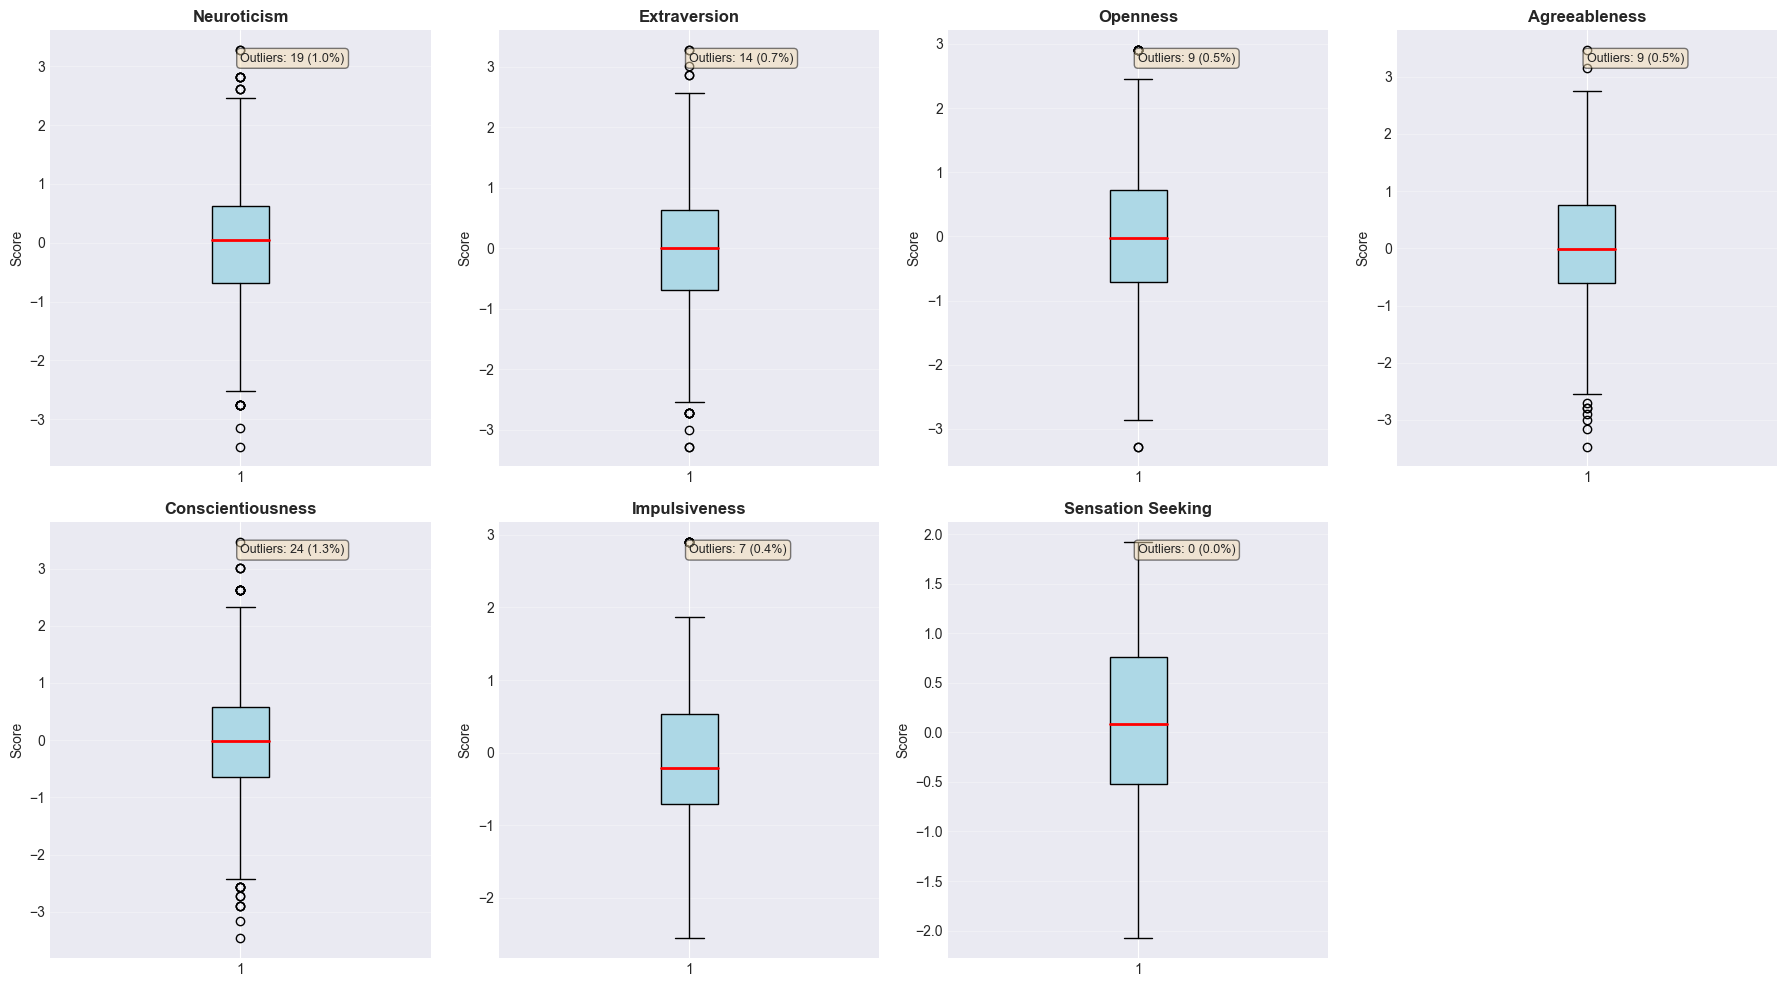


📊 Outlier Summary:
--------------------------------------------------------------------------------
Nscore      :  19 outliers ( 1.01%)
Escore      :  14 outliers ( 0.74%)
Oscore      :   9 outliers ( 0.48%)
Ascore      :   9 outliers ( 0.48%)
Cscore      :  24 outliers ( 1.27%)
Impulsive   :   7 outliers ( 0.37%)
SS          :   0 outliers ( 0.00%)


In [76]:
"""
Boxplot untuk deteksi outlier pada personality traits.
"""

print("\n" + "="*80)
print("📦 OUTLIER DETECTION: BOXPLOTS")
print("="*80)

# Boxplots
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.ravel()

for idx, trait in enumerate(personality_traits):
    ax = axes[idx]
    
    # Boxplot
    bp = ax.boxplot(df[trait], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='black'),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'),
                    medianprops=dict(color='red', linewidth=2))
    
    ax.set_title(trait_names[trait], fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    
    # Calculate outliers using IQR method
    Q1 = df[trait].quantile(0.25)
    Q3 = df[trait].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[trait] < lower_bound) | (df[trait] > upper_bound)]
    n_outliers = len(outliers)
    
    ax.text(0.5, 0.95, f'Outliers: {n_outliers} ({n_outliers/len(df)*100:.1f}%)',
            transform=ax.transAxes, fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remove empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('../results/figures/07_personality_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Outlier Summary:")
print("-"*80)
for trait in personality_traits:
    Q1 = df[trait].quantile(0.25)
    Q3 = df[trait].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[trait] < lower_bound) | (df[trait] > upper_bound)]
    n_outliers = len(outliers)
    
    print(f"{trait:12s}: {n_outliers:3d} outliers ({n_outliers/len(df)*100:5.2f}%)")



🎻 VIOLIN PLOTS: PERSONALITY TRAITS


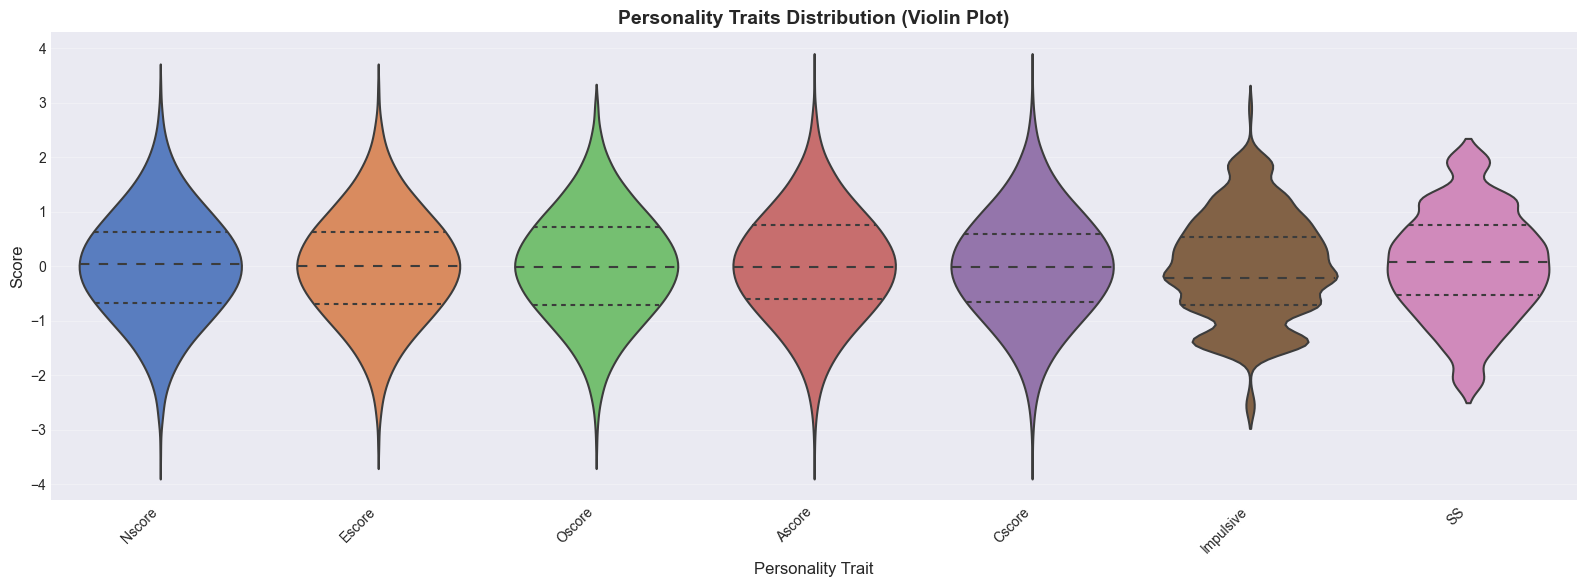

In [ ]:
"""
Violin plot untuk visualisasi distribusi personality traits.
"""

print("\n" + "="*80)
print("🎻 VIOLIN PLOTS: PERSONALITY TRAITS")
print("="*80)

# Prepare data for violin plot
df_personality_melted = df[personality_traits].melt(var_name='Trait', value_name='Score')

# Violin plot
plt.figure(figsize=(16, 6))
sns.violinplot(data=df_personality_melted, x='Trait', y='Score', 
               palette='muted', inner='quartile')
plt.title('Personality Traits Distribution (Violin Plot)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Personality Trait', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../results/figures/08_personality_violin.png', dpi=300, bbox_inches='tight')
plt.show()



💊 DRUG CONSUMPTION ANALYSIS

Drug Prevalence (Any Use):
--------------------------------------------------------------------------------


,Prevalence (%)
Caff,98.5676
Choc,98.3024
Alcohol,98.1963
Cannabis,78.0902
Nicotine,77.2944
Amphet,48.2228
Mushrooms,47.9045
Benzos,46.9496
Ecstasy,45.8355
Coke,44.9337


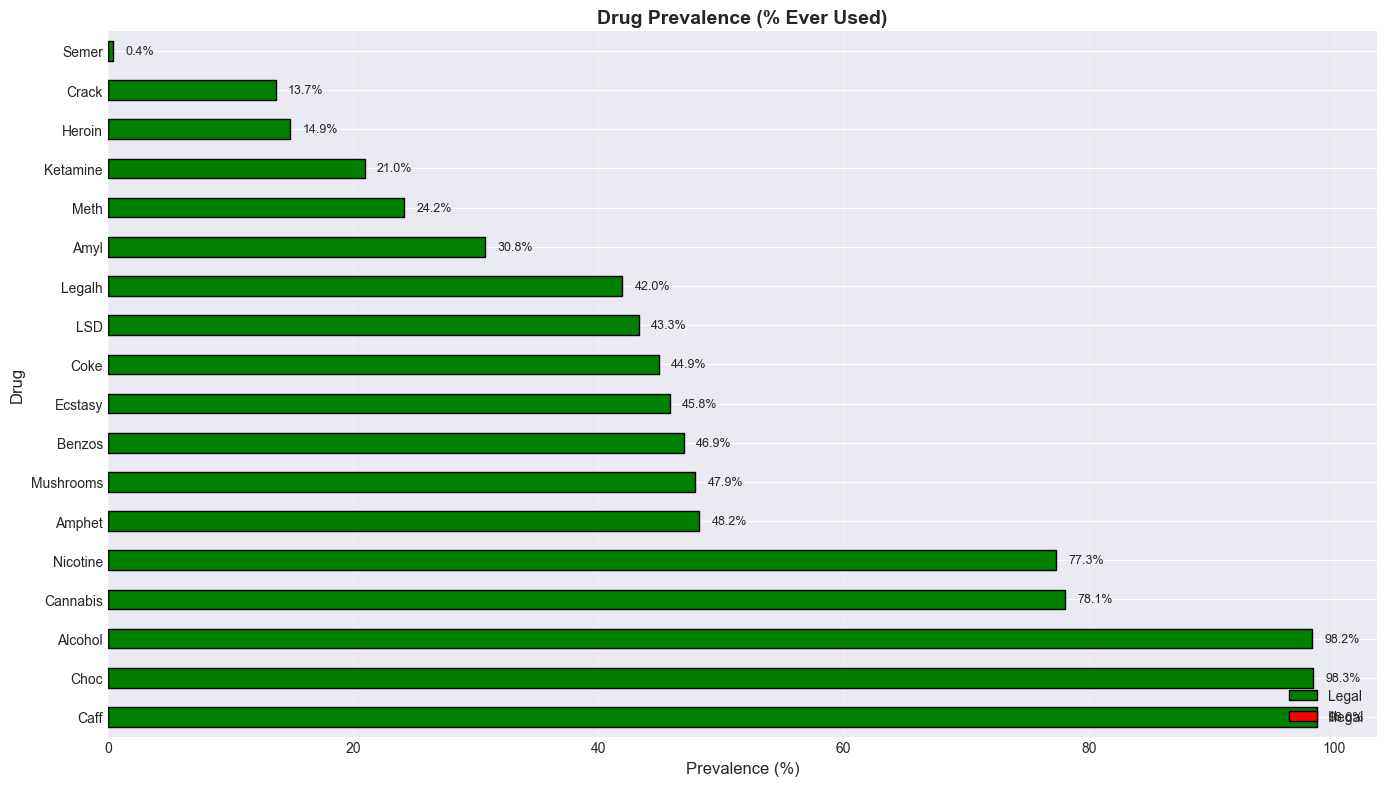


📌 Key Findings:
   • Highest prevalence: Caff (98.6%)
   • Lowest prevalence: Semer (0.4%)
   • Legal drugs generally have higher prevalence


In [ ]:
"""
⚠️ CELL INI DIGANTI TOTAL!
Analisis prevalensi konsumsi drugs menggunakan THRESHOLD 0.87.
Drug values adalah NUMERIC (bukan categorical).
"""

print("\n" + "="*80)
print("💊 DRUG CONSUMPTION ANALYSIS - PREVALENCE")
print("="*80)

# THRESHOLD DEFINITION
THRESHOLD = 0.87
print(f"\n🎯 THRESHOLD: {THRESHOLD}")
print(f"   • Value > {THRESHOLD} = Recent drug use (User)")
print(f"   • Value ≤ {THRESHOLD} = No recent use (Non-User)")
print("="*80)

all_drugs = legal_drugs + illegal_drugs

# Calculate prevalence untuk setiap drug
drug_prevalence = {}
drug_stats = {}

for drug in all_drugs:
    # Recent users (value > 0.87)
    recent_users = (df[drug] > THRESHOLD).sum()
    prevalence = (recent_users / len(df)) * 100
    
    # Statistics
    mean_val = df[drug].mean()
    std_val = df[drug].std()
    min_val = df[drug].min()
    max_val = df[drug].max()
    
    drug_prevalence[drug] = prevalence
    drug_stats[drug] = {
        'Recent_Users': recent_users,
        'Prevalence_%': prevalence,
        'Mean': mean_val,
        'Std': std_val,
        'Min': min_val,
        'Max': max_val
    }

# Convert to DataFrame
drug_prev_df = pd.DataFrame.from_dict(drug_prevalence, orient='index', 
                                       columns=['Prevalence (%)']).sort_values(
                                           'Prevalence (%)', ascending=False)

drug_stats_df = pd.DataFrame.from_dict(drug_stats, orient='index')

print("\n📊 Drug Prevalence (Recent Use, Value > 0.87):")
print("-"*80)
display(drug_prev_df)

print("\n📈 Detailed Drug Statistics:")
print("-"*80)
display(drug_stats_df.round(3))

# Visualization
fig, ax = plt.subplots(figsize=(14, 8))

# Color code: Legal (green) vs Illegal (red)
colors = ['green' if drug in legal_drugs else 'red' for drug in drug_prev_df.index]

drug_prev_df.plot(kind='barh', ax=ax, color=colors, edgecolor='black', 
                  legend=False)
ax.set_title(f'Drug Prevalence (% Recent Use, Threshold > {THRESHOLD})', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Prevalence (%)', fontsize=12)
ax.set_ylabel('Drug', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(drug_prev_df['Prevalence (%)']):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9)

# Add vertical line at threshold percentage
ax.axvline(10, color='blue', linestyle='--', linewidth=1, alpha=0.5, 
           label='10% threshold')

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='Legal Drugs'),
    Patch(facecolor='red', edgecolor='black', label='Illegal Drugs')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.savefig('../results/figures/09_drug_prevalence.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📌 Key Findings:")
print(f"   • Highest prevalence: {drug_prev_df.index[0]} ({drug_prev_df.iloc[0, 0]:.1f}%)")
print(f"   • Lowest


💊 DRUG CONSUMPTION ANALYSIS - PREVALENCE

🎯 KRITERIA 'RECENT USER':
   • CL3: Used in Last Year
   • CL4: Used in Last Month
   • CL5: Used in Last Week
   • CL6: Used in Last Day
   • CL0-CL2: Not recent use

📊 Drug Prevalence (Recent Use: CL3-CL6):
--------------------------------------------------------------------------------


,Prevalence (%)
Choc,97.6127
Caff,96.7639
Alcohol,92.7851
Nicotine,56.2334
Cannabis,52.9973
Legalh,29.9204
Benzos,28.3820
Ecstasy,27.4271
Amphet,23.1300
Mushrooms,23.0239



📈 Detailed Drug Statistics:
--------------------------------------------------------------------------------


,Recent_Users,Prevalence_%,CL0,CL1,CL2,CL3,CL4,CL5,CL6
Alcohol,1749,92.7851,34,34,68,198,287,759,505
Caff,1824,96.7639,27,10,24,60,106,273,1385
Choc,1840,97.6127,32,3,10,54,296,683,807
Nicotine,1060,56.2334,428,193,204,185,108,157,610
Amphet,436,23.1300,976,230,243,198,75,61,102
Amyl,133,7.0557,1305,210,237,92,24,14,3
Benzos,535,28.3820,1000,116,234,236,120,84,95
Cannabis,999,52.9973,413,207,266,211,140,185,463
Coke,417,22.1220,1038,160,270,258,99,41,19
Crack,79,4.1910,1627,67,112,59,9,9,2


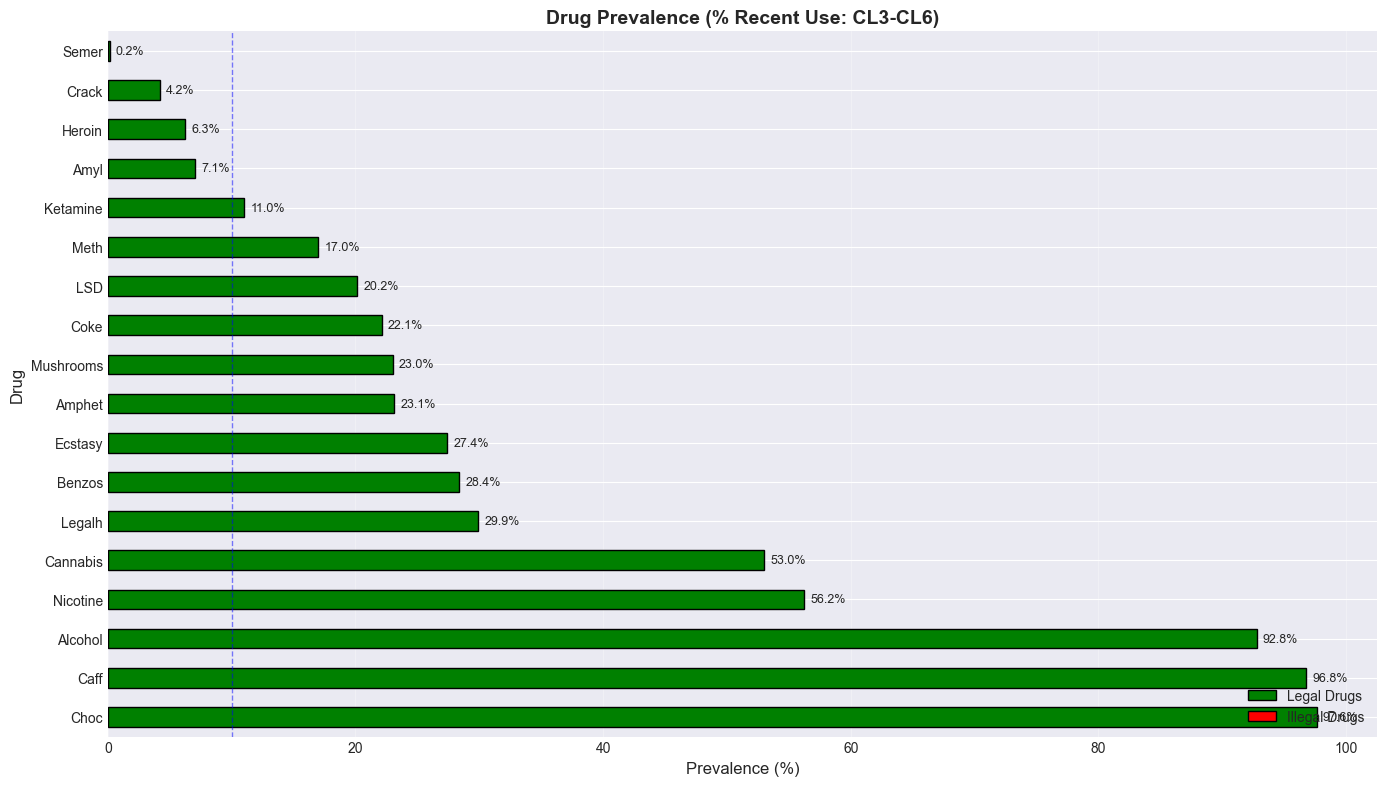


📌 Key Findings:
   • Highest prevalence: Choc (97.6%)
   • Lowest prevalence: Semer (0.2%)

🔍 ILLEGAL DRUGS ANALYSIS:
Top 5 Illegal Drugs:
   1. Cannabis: 53.0%
   2. Legalh: 29.9%
   3. Benzos: 28.4%
   4. Ecstasy: 27.4%
   5. Amphet: 23.1%


In [94]:
"""
⚠️ CELL INI DIGANTI TOTAL!
Analisis prevalensi konsumsi drugs menggunakan KRITERIA YANG BENAR.
Drug values adalah CATEGORICAL (CL0-CL6).
"""

print("\n" + "="*80)
print("💊 DRUG CONSUMPTION ANALYSIS - PREVALENCE")
print("="*80)

# KRITERIA YANG BENAR dari proposal Anda
print(f"\n🎯 KRITERIA 'RECENT USER':")
print(f"   • CL3: Used in Last Year")
print(f"   • CL4: Used in Last Month") 
print(f"   • CL5: Used in Last Week")
print(f"   • CL6: Used in Last Day")
print(f"   • CL0-CL2: Not recent use")
print("="*80)

all_drugs = legal_drugs + illegal_drugs

# Calculate prevalence untuk setiap drug
drug_prevalence = {}
drug_stats = {}

for drug in all_drugs:
    # Recent users (CL3, CL4, CL5, CL6)
    recent_users = df[drug].isin(['CL3', 'CL4', 'CL5', 'CL6']).sum()
    prevalence = (recent_users / len(df)) * 100
    
    # Count untuk setiap kategori
    cl0_count = (df[drug] == 'CL0').sum()
    cl1_count = (df[drug] == 'CL1').sum()
    cl2_count = (df[drug] == 'CL2').sum()
    cl3_count = (df[drug] == 'CL3').sum()
    cl4_count = (df[drug] == 'CL4').sum()
    cl5_count = (df[drug] == 'CL5').sum()
    cl6_count = (df[drug] == 'CL6').sum()
    
    drug_prevalence[drug] = prevalence
    drug_stats[drug] = {
        'Recent_Users': recent_users,
        'Prevalence_%': prevalence,
        'CL0': cl0_count,
        'CL1': cl1_count,
        'CL2': cl2_count,
        'CL3': cl3_count,
        'CL4': cl4_count,
        'CL5': cl5_count,
        'CL6': cl6_count
    }

# Convert to DataFrame
drug_prev_df = pd.DataFrame.from_dict(drug_prevalence, orient='index', 
                                       columns=['Prevalence (%)']).sort_values(
                                           'Prevalence (%)', ascending=False)

drug_stats_df = pd.DataFrame.from_dict(drug_stats, orient='index')

print("\n📊 Drug Prevalence (Recent Use: CL3-CL6):")
print("-"*80)
display(drug_prev_df)

print("\n📈 Detailed Drug Statistics:")
print("-"*80)
display(drug_stats_df)

# Visualization
fig, ax = plt.subplots(figsize=(14, 8))

# Color code: Legal (green) vs Illegal (red)
colors = ['green' if drug in legal_drugs else 'red' for drug in drug_prev_df.index]

drug_prev_df.plot(kind='barh', ax=ax, color=colors, edgecolor='black', 
                  legend=False)
ax.set_title('Drug Prevalence (% Recent Use: CL3-CL6)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Prevalence (%)', fontsize=12)
ax.set_ylabel('Drug', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(drug_prev_df['Prevalence (%)']):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9)

# Add vertical line at threshold percentage
ax.axvline(10, color='blue', linestyle='--', linewidth=1, alpha=0.5, 
           label='10% threshold')

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='Legal Drugs'),
    Patch(facecolor='red', edgecolor='black', label='Illegal Drugs')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()
plt.savefig('../results/figures/09_drug_prevalence.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📌 Key Findings:")
print(f"   • Highest prevalence: {drug_prev_df.index[0]} ({drug_prev_df.iloc[0, 0]:.1f}%)")
print(f"   • Lowest prevalence: {drug_prev_df.index[-1]} ({drug_prev_df.iloc[-1, 0]:.1f}%)")

# Additional analysis untuk illegal drugs saja
print(f"\n🔍 ILLEGAL DRUGS ANALYSIS:")
illegal_prev = drug_prev_df.loc[illegal_drugs].sort_values('Prevalence (%)', ascending=False)
print("Top 5 Illegal Drugs:")
for i, (drug, row) in enumerate(illegal_prev.head().iterrows()):
    print(f"   {i+1}. {drug}: {row['Prevalence (%)']:.1f}%")